# Project 3_Heart Disease prediction

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("heart disease.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.shape

(1025, 14)

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.duplicated().any()

True

In [7]:
df.duplicated().sum()

723

In [8]:
df=df.drop_duplicates()

In [9]:
df.shape

(302, 14)

## Data processing

In [10]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [11]:
# seperate categorical column into numerical column
cate_col=[]
num_col=[]
for column in df.columns:
    if df[column].nunique()<=10:
        cate_col.append(column)
    else:
        num_col.append(column)

In [12]:
cate_col

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [13]:
num_col

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

## encoding categorical data

In [14]:
cate_col

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [15]:
df["cp"].unique()

array([0, 1, 2, 3])

we are going to convert these unique value in binary vector.

Here is 4 unique value so, 4 column will be created. These all will be dummy variable and created by
using get_dummy method that is used when more than 2 unique value.
Because of the binary vector one problem will be created in get dummy method that is called dummy variable trap.

dummy variable trap is a scenario in which independent variable are highly correlated.
In simple term 1 variable can predict by other. So, we remove the first column for overcome the dummy variable trap.




In [16]:
# remove the column where in encoding is not required, becuase already have 0 and 1.
cate_col.remove("sex")
cate_col.remove("target")

In [17]:
df=pd.get_dummies(df,columns=cate_col,drop_first=True)

In [18]:
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


## feature scaling

feature scaling allow us to put the fatures in same scale. It is essential in ML algorithm that 
calculate distance between data. If not scaled then features with higher value range starts 
dominating when calculating distances.

#### feature scaling required in:

Linear Regression,

logistic regression,

KNN,

Neural network,

SVM.  

#### feature scaling not required in non-linear ML algorithm:
    
Decision Tree,

Random forest,

Adaboost,

Naive-Bayes

Any algorithm which is not distance based is not affected by Feature scaling.
    


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler=StandardScaler()

In [21]:
num_col

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [22]:
df[num_col]

,age,trestbps,chol,thalach,oldpeak
0,52,125,212,168,1.0
1,53,140,203,155,3.1
2,70,145,174,125,2.6
3,61,148,203,161,0.0
4,62,138,294,106,1.9
...,...,...,...,...,...
723,68,120,211,115,1.5
733,44,108,141,175,0.6
739,52,128,255,161,0.0
843,59,160,273,125,0.0


In [23]:
df[num_col]=scaler.fit_transform(df[num_col])

In [24]:
df.head(3) # the data scaled between -4 to 4, -3 to 3. it is totally depend on available data.

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


## split the data into train-test

In [25]:
# seperate independent and dependent variable
X= df.drop("target",axis=1)
y= df["target"]

In [26]:
X.head(2)

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1


In [27]:
y.head(2)

0    0
1    0
Name: target, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [30]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((241, 22), (61, 22), (241,), (61,))

In [31]:
X.shape,y.shape

((302, 22), (302,))

# Linear ML algorithm

### import model

In [32]:
df["target"].unique()

array([0, 1])

In [33]:
# Because of the target variable have only two value 0 and 1 .so it is classification problem.

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

### Model training

In [35]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

svm=SVC()
svm.fit(X_train,y_train)

KNN=KNeighborsClassifier()
KNN.fit(X_train,y_train)

KNeighborsClassifier()

### prediction on test data

In [36]:
y_pred1=lr.predict(X_test)
y_pred2=svm.predict(X_test)
y_pred3=KNN.predict(X_test)

In [37]:
df1=pd.DataFrame({"Actual":y_test,"lr":y_pred1,"svm":y_pred2,"KNN":y_pred3})

In [38]:
df1

,Actual,lr,svm,KNN
245,1,1,1,1
349,0,0,0,0
135,0,0,0,0
389,1,0,0,0
66,1,1,1,1
...,...,...,...,...
402,1,1,1,1
123,1,1,1,1
739,0,0,0,0
274,1,0,0,0


#### compare performance visually

In [39]:
import matplotlib.pyplot as plt

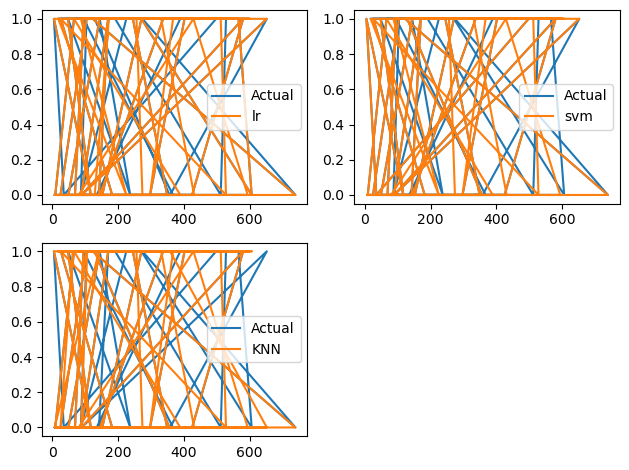

In [40]:
plt.subplot(221)
plt.plot(df1["Actual"],label="Actual")
plt.plot(df1["lr"],label="lr")
plt.legend()

plt.subplot(222)
plt.plot(df1["Actual"],label="Actual")
plt.plot(df1["svm"],label="svm")
plt.legend()

plt.subplot(223)
plt.plot(df1["Actual"],label="Actual")
plt.plot(df1["KNN"],label="KNN")
plt.legend()

plt.tight_layout() # for overcome the overlap in graph
plt.legend()
plt.show()

## Evaluating the algorithm

In [41]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#### accuracy

In [42]:
score1=accuracy_score(y_pred1,y_test)
score2=accuracy_score(y_pred2,y_test)
score3=accuracy_score(y_pred3,y_test)

In [43]:
print(score1,score2,score3)

0.7868852459016393 0.8032786885245902 0.7377049180327869


In [44]:
# for KNN accuracy is too low. so we will check in which K value it accuracy will be high

In [45]:
score=[]
for k in range(1,30):
    KNN=KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train,y_train)
    y_pred=KNN.predict(X_test)
    score.append(accuracy_score(y_pred,y_test))
    

In [46]:
score # here at K=2 we got maximum accuracy

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

In [47]:
KNN=KNeighborsClassifier(n_neighbors=2)
KNN.fit(X_train,y_train)
y_pred4=KNN.predict(X_test)
accuracy_score(y_pred4,y_test)

0.8032786885245902

#### confusion matrix

In [48]:
conf_mat1=confusion_matrix(y_pred1,y_test)
conf_mat2=confusion_matrix(y_pred2,y_test)
conf_mat3=confusion_matrix(y_pred4,y_test)

In [49]:
print(conf_mat1)
print(conf_mat2)
print(conf_mat3)

[[24  5]
 [ 8 24]]
[[24  4]
 [ 8 25]]
[[27  7]
 [ 5 22]]


#### classification report

In [50]:
class_report1=classification_report(y_pred1,y_test)
class_report2=classification_report(y_pred2,y_test)
class_report3=classification_report(y_pred4,y_test)

In [51]:
print(class_report1)
print(class_report2)
print(class_report3)

              precision    recall  f1-score   support

           0       0.75      0.83      0.79        29
           1       0.83      0.75      0.79        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61

              precision    recall  f1-score   support

           0       0.75      0.86      0.80        28
           1       0.86      0.76      0.81        33

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61

              precision    recall  f1-score   support

           0       0.84      0.79      0.82        34
           1       0.76      0.81      0.79        27

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



# Non-linear ML Algorithm

Non-linear algorithm is not a distance based. So, encoding and feature scaling are not required.

In [52]:
df2=pd.read_csv("heart disease.csv")

In [53]:
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [54]:
df2.duplicated().sum()

723

In [55]:
df2.shape

(1025, 14)

In [56]:
df2=df2.drop_duplicates()

In [57]:
df2.shape

(302, 14)

In [58]:
# seperate independent and dependent variable
X= df2.drop("target",axis=1)
y=df2["target"]

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### import model

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

### model training

In [61]:
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)

RF=RandomForestClassifier()
RF.fit(X_train,y_train)

GB=GradientBoostingClassifier()
GB.fit(X_train,y_train)

GradientBoostingClassifier()

### Prediction on test data

In [62]:
y_pred5=DT.predict(X_test)
y_pred6=RF.predict(X_test)
y_pred7=GB.predict(X_test)

In [63]:
df3=pd.DataFrame({"Actual":y_test,"DT":y_pred5,"RF":y_pred6,"GB":y_pred7})

In [64]:
df3

,Actual,DT,RF,GB
245,1,1,1,1
349,0,1,0,1
135,0,0,0,0
389,1,0,1,0
66,1,1,1,1
...,...,...,...,...
402,1,0,1,1
123,1,1,1,1
739,0,0,0,0
274,1,0,0,0


In [65]:
import seaborn as sns

<AxesSubplot: >

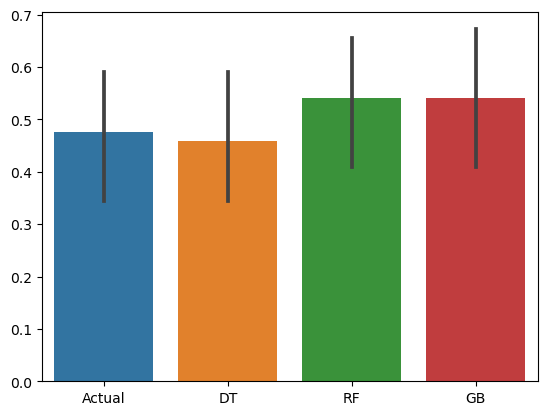

In [66]:
sns.barplot(df3)

# compare performance visually

In [67]:
import matplotlib.pyplot as plt

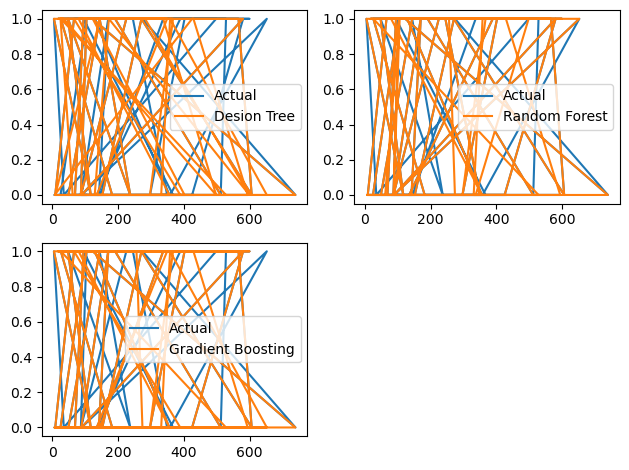

In [68]:
plt.subplot(221)
plt.plot(df3["Actual"],label="Actual")
plt.plot(df3["DT"],label="Desion Tree")
plt.legend()

plt.subplot(222)
plt.plot(df3["Actual"],label="Actual")
plt.plot(df3["RF"],label="Random Forest")
plt.legend()

plt.subplot(223)
plt.plot(df3["Actual"],label="Actual")
plt.plot(df3["GB"],label="Gradient Boosting")
plt.legend()

plt.tight_layout() # for overcome the overlap in graph
plt.legend()
plt.show()

### Evaluating the algorithm

### Accuracy

In [69]:
score5=accuracy_score(y_pred5,y_test)
score6=accuracy_score(y_pred6,y_test)
score7=accuracy_score(y_pred7,y_test)

In [70]:
print(score5,score6,score7)

0.6885245901639344 0.8360655737704918 0.8032786885245902


#### Insights
Random forest have high accuracy

In [74]:
final_data=pd.DataFrame({"Model":["lr","svm","KNN","DT","RF","GB"],
                        "Accuracy":[score1,score2,accuracy_score(y_pred4,y_test),score5,score6,score7]})

In [75]:
final_data

,Model,Accuracy
0,lr,0.786885
1,svm,0.803279
2,KNN,0.803279
3,DT,0.688525
4,RF,0.836066
5,GB,0.803279


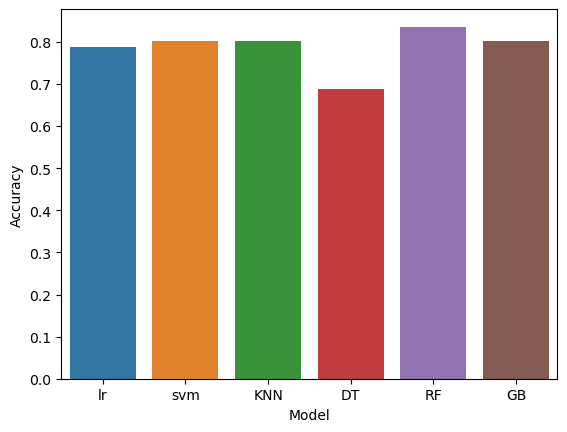

In [76]:
sns.barplot(x=final_data["Model"],y=final_data["Accuracy"])
plt.show()

#### Insights
Random forest have high accuracy

### confusion matrix

In [78]:
conf_mat5=confusion_matrix(y_pred5,y_test)
conf_mat6=confusion_matrix(y_pred6,y_test)
conf_mat7=confusion_matrix(y_pred7,y_test)

In [79]:
print(conf_mat5)
print(conf_mat6)
print(conf_mat7)

[[23 10]
 [ 9 19]]
[[25  3]
 [ 7 26]]
[[24  4]
 [ 8 25]]


In [80]:
### classification report
class_report5=classification_report(y_pred5,y_test)
class_report6=classification_report(y_pred6,y_test)
class_report7=classification_report(y_pred7,y_test)

In [81]:
print(class_report5)
print(class_report6)
print(class_report7)

              precision    recall  f1-score   support

           0       0.72      0.70      0.71        33
           1       0.66      0.68      0.67        28

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61

              precision    recall  f1-score   support

           0       0.78      0.89      0.83        28
           1       0.90      0.79      0.84        33

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

              precision    recall  f1-score   support

           0       0.75      0.86      0.80        28
           1       0.86      0.76      0.81        33

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61



## Train our RandomForestClassifier on entire dataset

In [82]:
# seperate independent and dependent variable
X= df2.drop("target",axis=1)
y=df2["target"]

In [83]:
X.shape,y.shape

((302, 13), (302,))

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
RF1=RandomForestClassifier()

In [86]:
RF1.fit(X,y)

RandomForestClassifier()

## prediction on new data

In [89]:
df2.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [91]:
new_data=pd.DataFrame({'age':52,
                       'sex':1,
                       'cp':0,
                       'trestbps':125,
                       'chol':212,
                       'fbs':0,
                       'restecg':1,
                       'thalach':168,
                       'exang':0,
                       'oldpeak':1.0,
                       'slope':2,
                       'ca':2,
                       'thal':3,
                      },index=[0])

In [92]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [94]:
prediction=RF1.predict(new_data)

In [95]:
if prediction[0]==0:
    print("No disease")
else:
    print("Disease")

No disease
